# Topic
- Supervised Learning practice
- predicting house price regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df = pd.read_csv('/content/housingdata.csv')
# head
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.shape

(506, 14)

주택가 Dataset info
1. **CRIM**: 범죄율 (인구 1인당 범죄 수)
2. **ZN**: 25,000 평방피트를 초과하는 거주 지역의 비율
3. **INDUS**: 비소매 상업 지역의 비율
4. **CHAS**: 찰스 강에 대한 더미 변수 (1: 강에 인접, 0: 인접하지 않음)
5. **NOX**: 질소 산화물 농도 (10배의 역수)
6. **RM**: 주택당 평균 방 수
7. **AGE**: 1940년 이전에 건축된 비율
8. **DIS**: 5개의 보스턴 고용 센터까지의 가중 거리
9. **RAD**: 고속도로 접근성 지수
10. **TAX**: 10,000달러당 재산세율
11. **PTRATIO**: 학생-교사 비율
12. **B**: 1000(Bk - 0.63)^2 (Bk는 흑인 인구 비율)
13. **LSTAT**: 하위 계층 인구 비율
14. **MEDV**: 중간 주택 가격 (단위: 1,000달러)


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
## fine the missing value
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


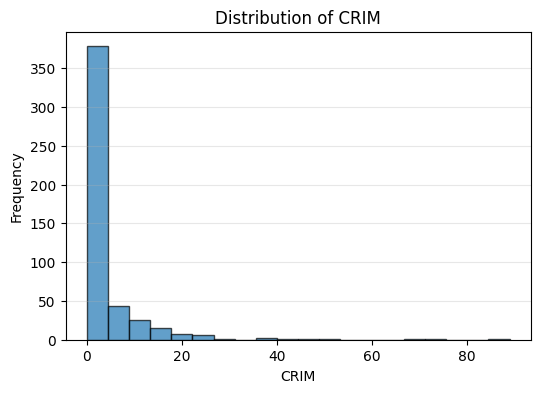

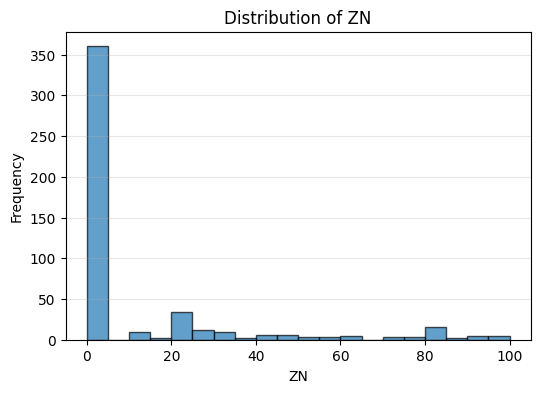

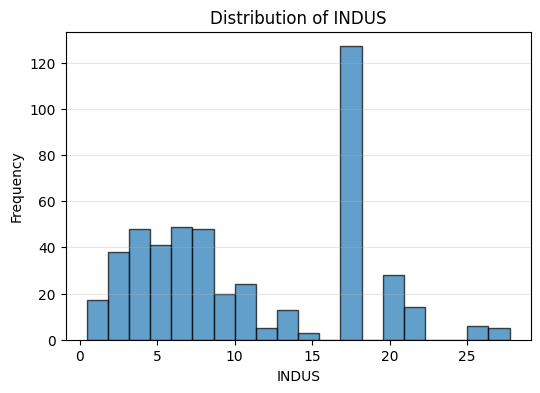

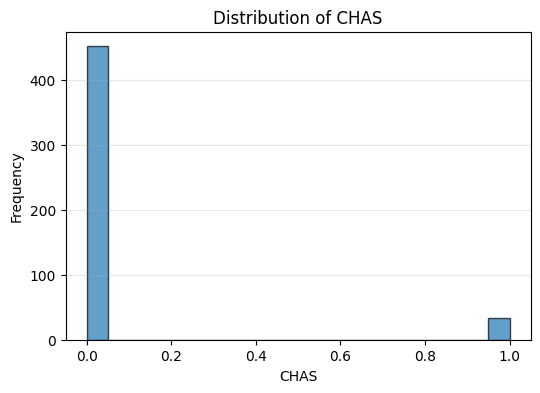

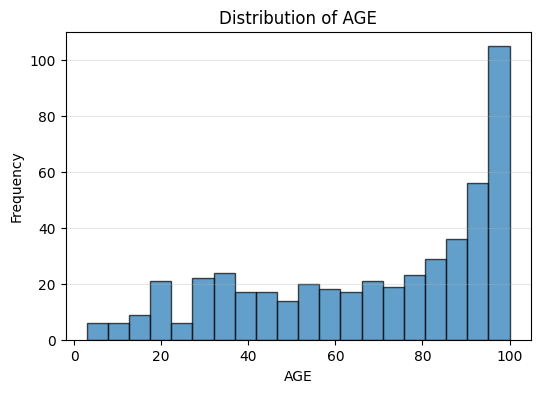

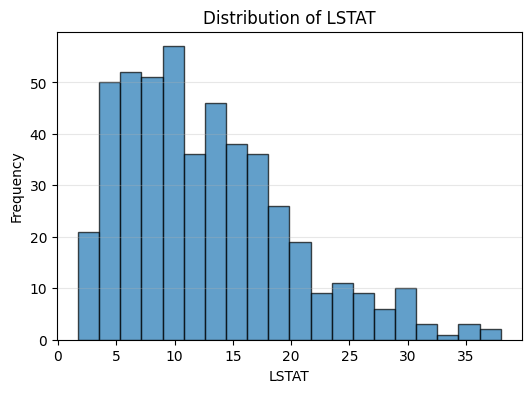

{'CRIM': {'Mean': 3.6118739711934156, 'Median': 0.253715, 'Mode': 0.01501},
 'ZN': {'Mean': 11.2119341563786, 'Median': 0.0, 'Mode': 0.0},
 'INDUS': {'Mean': 11.083991769547325, 'Median': 9.69, 'Mode': 18.1},
 'CHAS': {'Mean': 0.06995884773662552, 'Median': 0.0, 'Mode': 0.0},
 'AGE': {'Mean': 68.51851851851852,
  'Median': 76.80000000000001,
  'Mode': 100.0},
 'LSTAT': {'Mean': 12.715432098765433, 'Median': 11.43, 'Mode': 6.36}}

In [4]:
# Select only columns with missing values
missing_columns = df.columns[df.isnull().sum() > 0]
# Visualize the distribution of each column with missing values
distribution_plots = {}
for col in missing_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.3)
    plt.show()
# Check every cols' mean , median, mode
na_summary = {col: {'Mean': df[col].mean(),
                    'Median': df[col].median(),
                    'Mode': df[col].mode()[0]}
              for col in missing_columns}
na_summary

- CRIM: Highly skewed -> Use Median (0.25).
- ZN: Most values are 0 -> Use Mode (0).
- INDUS: Slight skewness -> Use Median (9.69).
- CHAS: Binary variable (0/1) -> Use Mode (0).
- AGE: Right-skewed -> Use Median (76.8).
- LSTAT: Slightly skewed -> Use Median (11.43).

In [5]:
# Fill missing values based on decisions
fill_values = {
    'CRIM': df['CRIM'].median(),
    'ZN': df['ZN'].mode()[0],
    'INDUS': df['INDUS'].median(),
    'CHAS': df['CHAS'].mode()[0],
    'AGE': df['AGE'].median(),
    'LSTAT': df['LSTAT'].median()
}

for col, value in fill_values.items():
    df[col].fillna(value, inplace=True)

# Confirm that all missing values are filled
missing_after_fill = df.isnull().sum()
missing_after_fill

<ipython-input-5-93435126b138>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value, inplace=True)


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


- Checking outlier


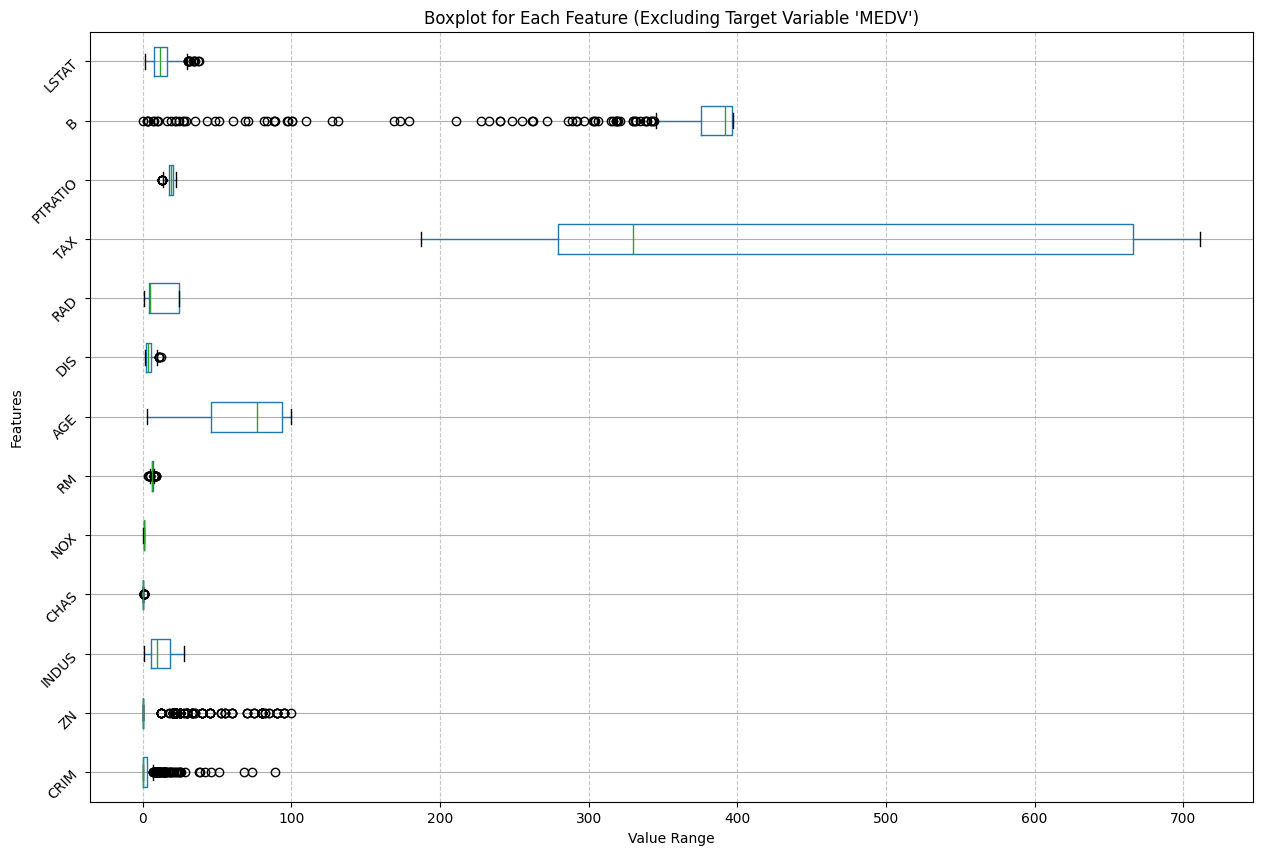

In [6]:
plt.figure(figsize=(15, 10))
df.drop(columns=['MEDV'], errors='ignore').boxplot(rot=45, vert=False)
plt.title("Boxplot for Each Feature (Excluding Target Variable 'MEDV')")
plt.xlabel("Value Range")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

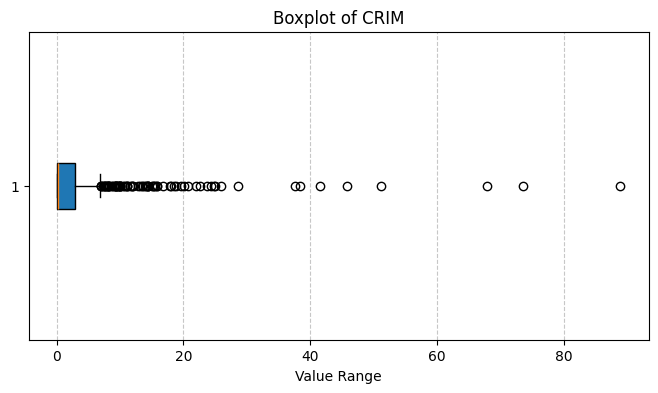

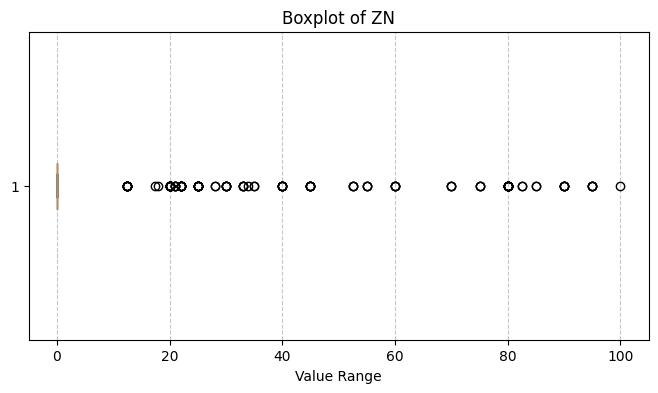

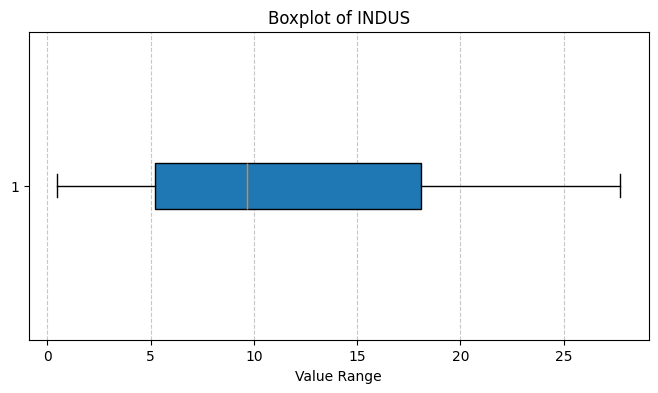

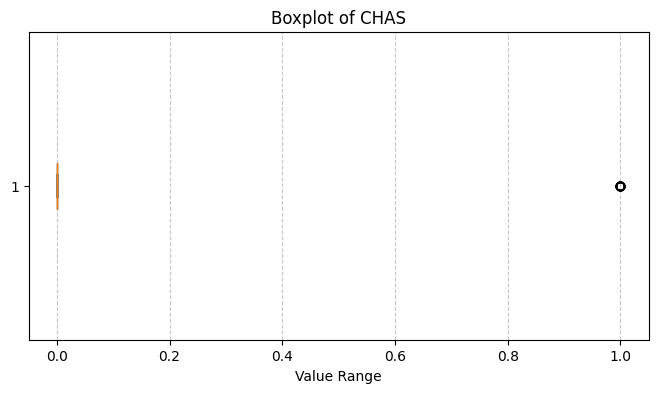

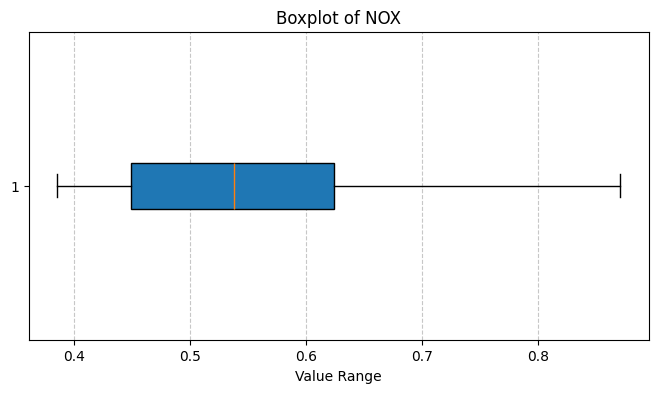

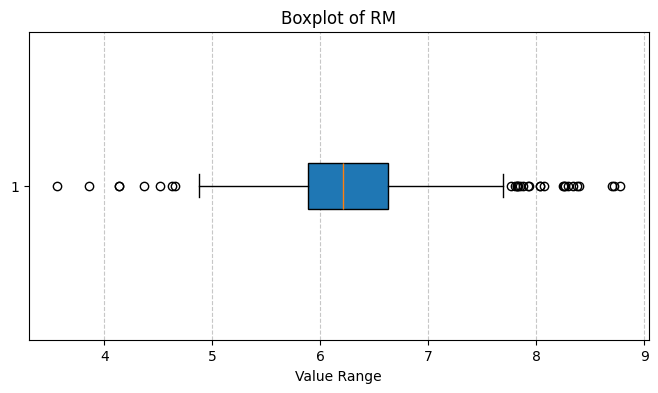

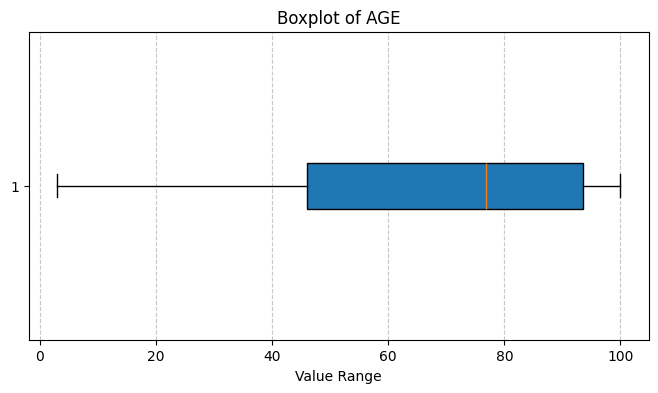

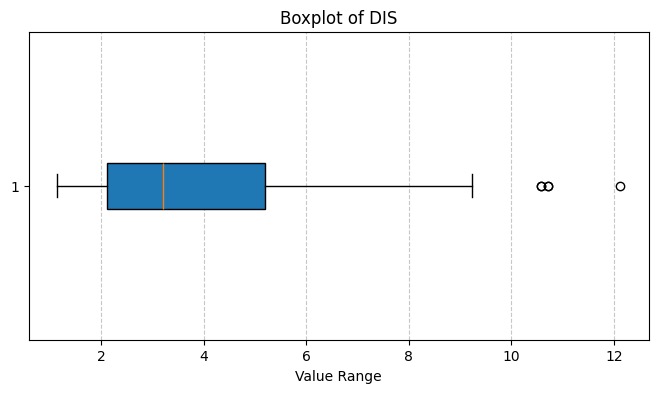

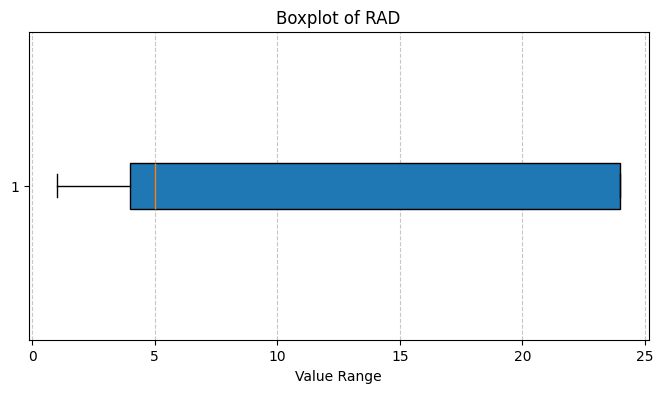

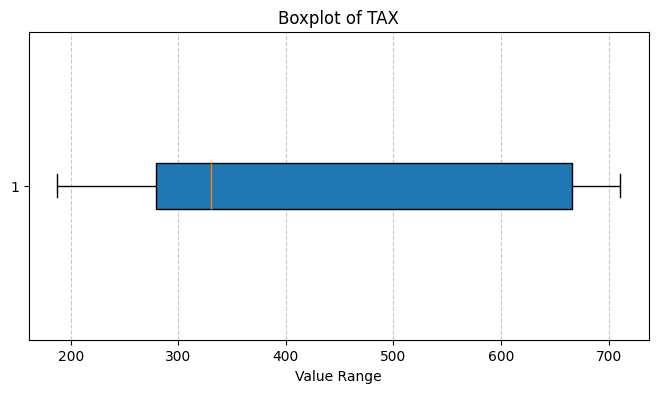

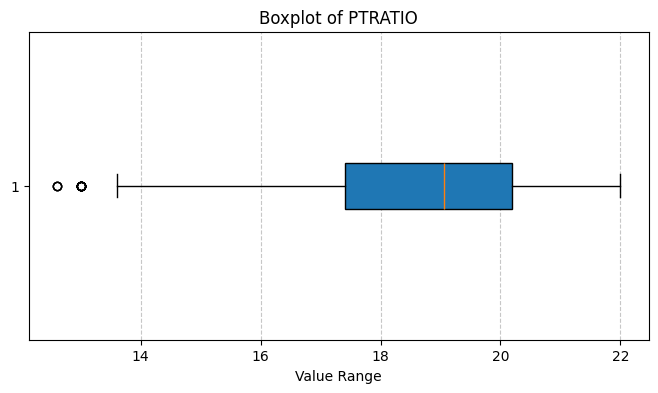

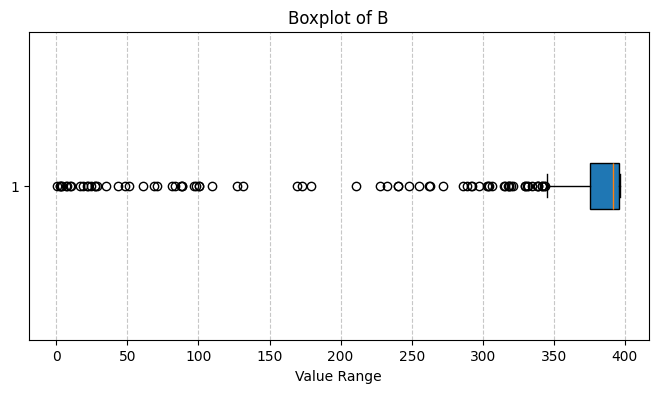

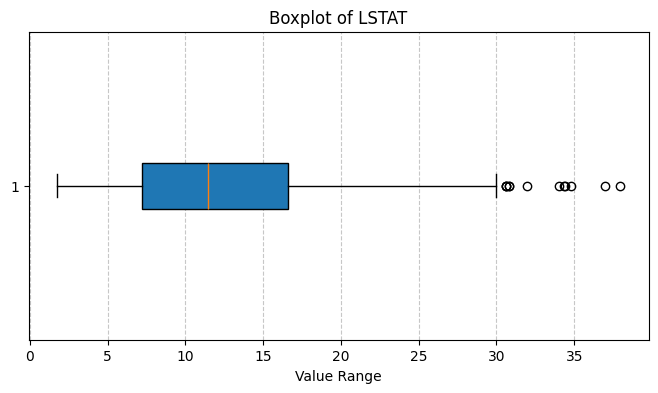

In [7]:
# Plot each feature's boxplot individually to avoid memory issues
for column in df.drop(columns=['MEDV'], errors='ignore').columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {column}")
    plt.xlabel("Value Range")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


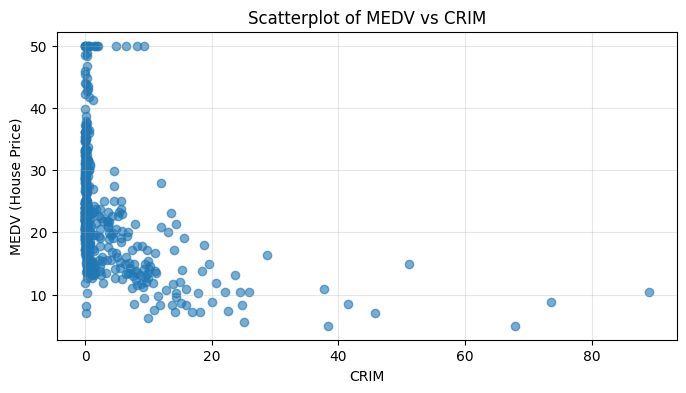

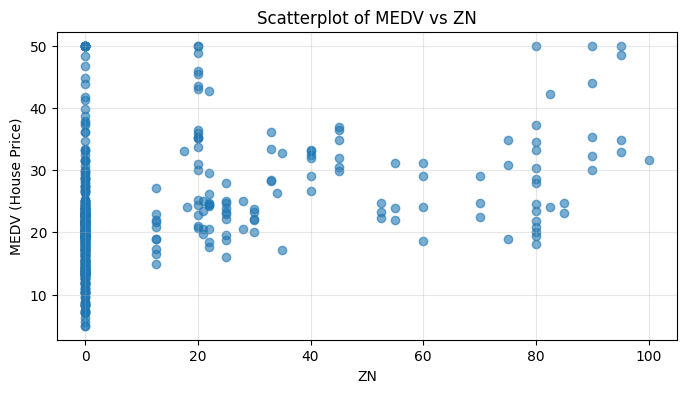

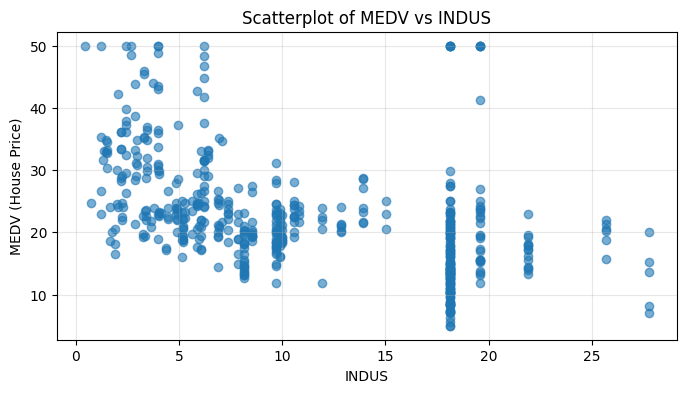

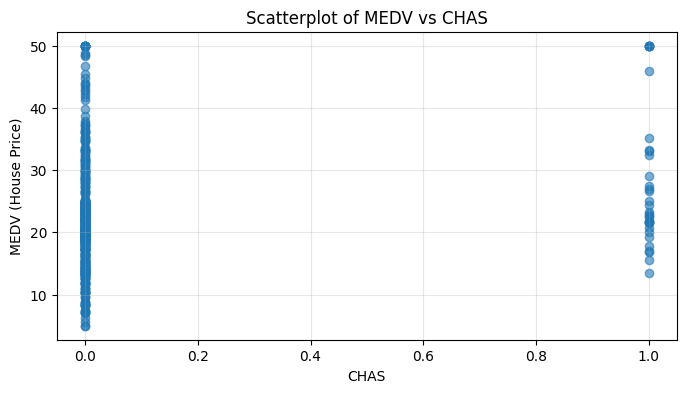

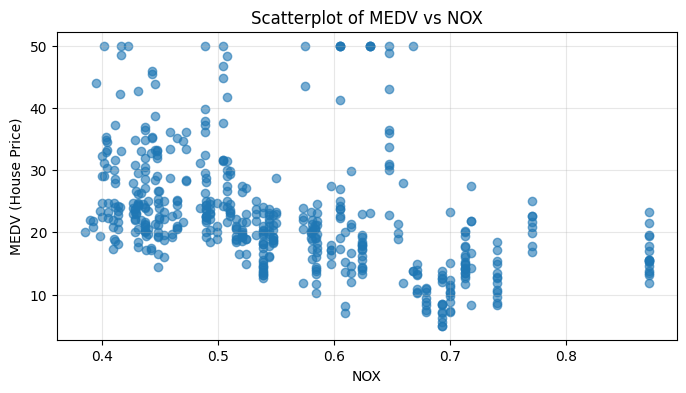

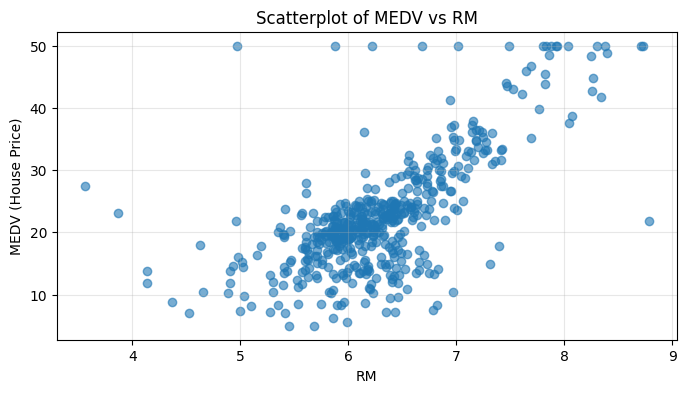

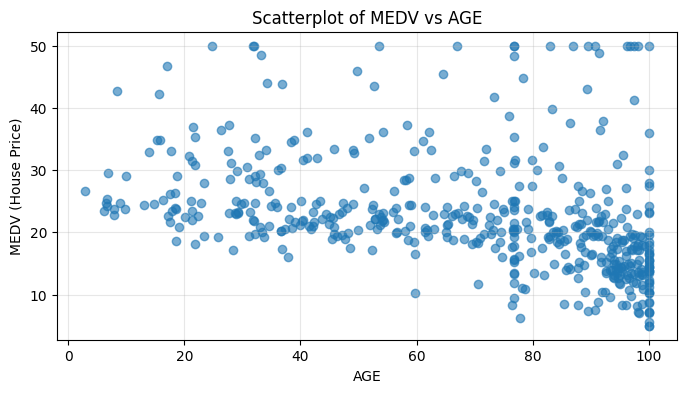

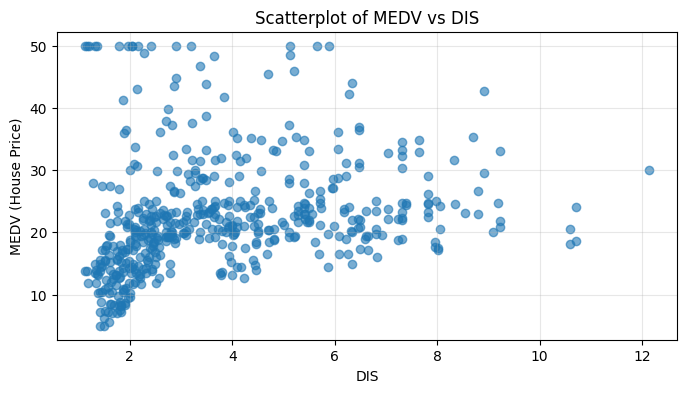

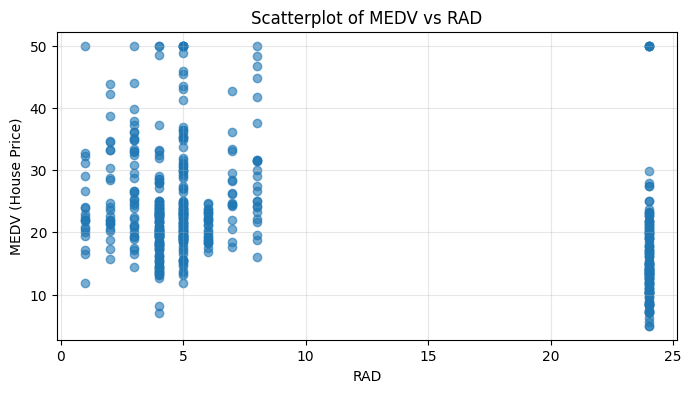

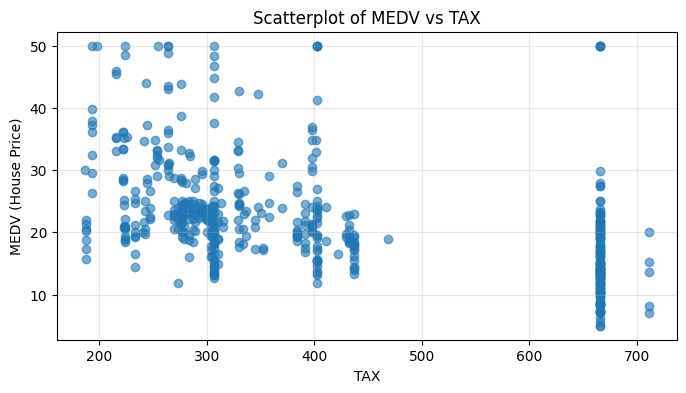

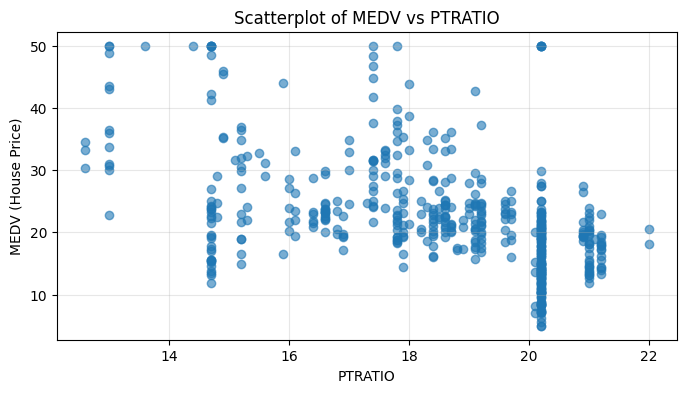

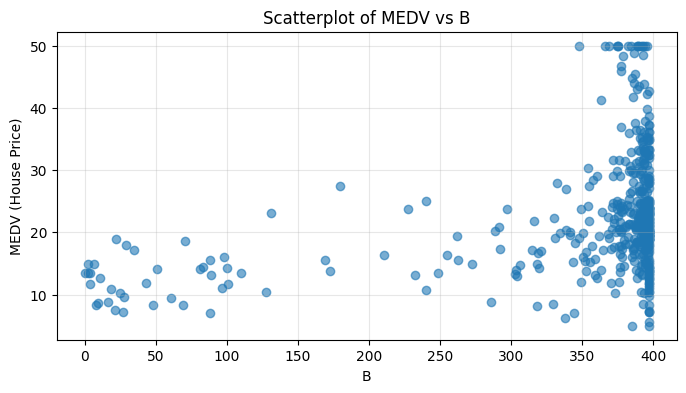

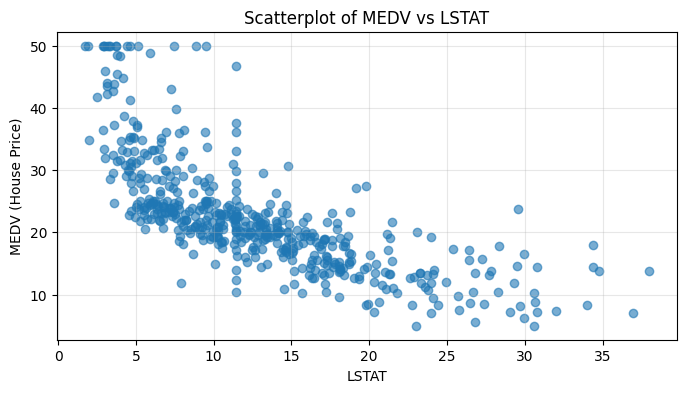

In [8]:
# Create scatterplots for MEDV vs. each feature
for column in df.drop(columns=['MEDV'], errors='ignore').columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[column], df['MEDV'], alpha=0.6)
    plt.title(f"Scatterplot of MEDV vs {column}")
    plt.xlabel(column)
    plt.ylabel("MEDV (House Price)")
    plt.grid(alpha=0.3)
    plt.show()

<ipython-input-9-4461f3a019f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'] , fit=norm);



 mu = 22.53 and sigma = 9.19



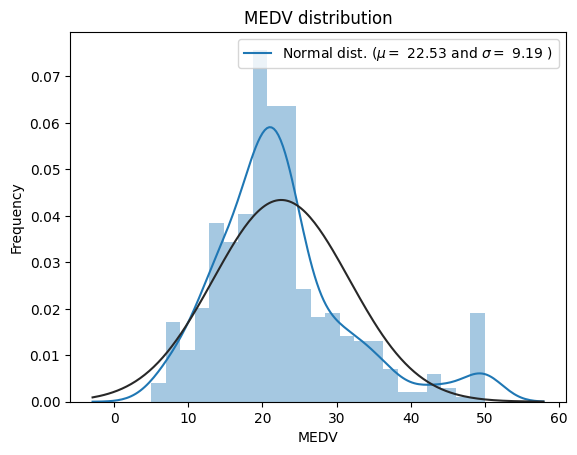

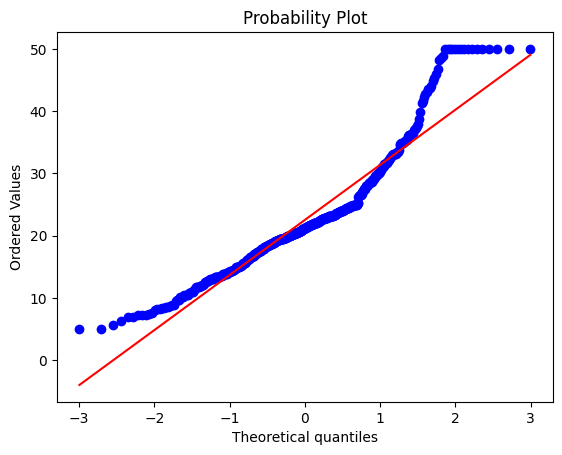

In [9]:
from scipy import stats
from scipy.stats import norm # Import the 'norm' function from scipy.stats

sns.distplot(df['MEDV'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['MEDV'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MEDV distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['MEDV'], plot=plt)
plt.show()

<ipython-input-10-eb61dcc6d61a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'] , fit=norm);



 mu = 3.09 and sigma = 0.39



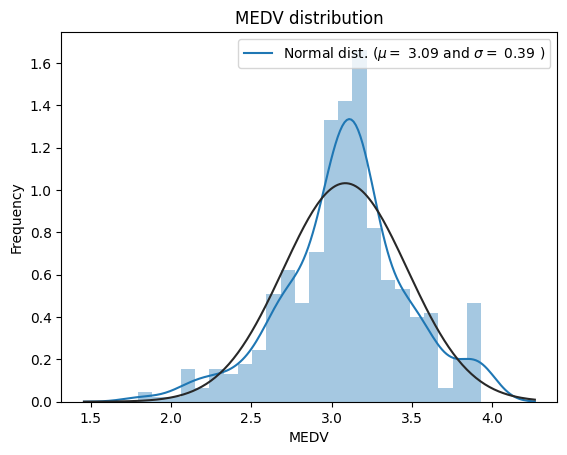

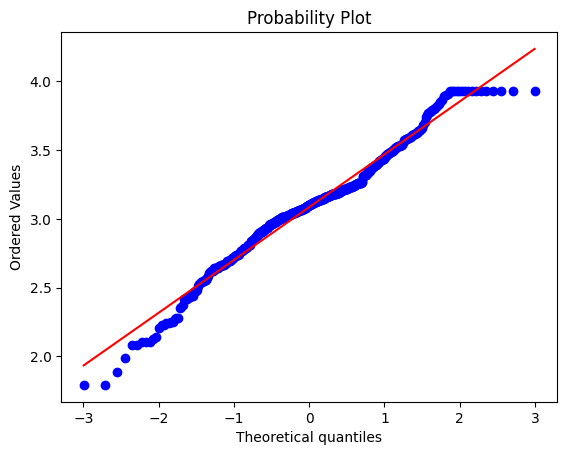

In [10]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["MEDV"] = np.log1p(df["MEDV"])

#Check the new distribution
sns.distplot(df['MEDV'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['MEDV'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MEDV distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['MEDV'], plot=plt)
plt.show()

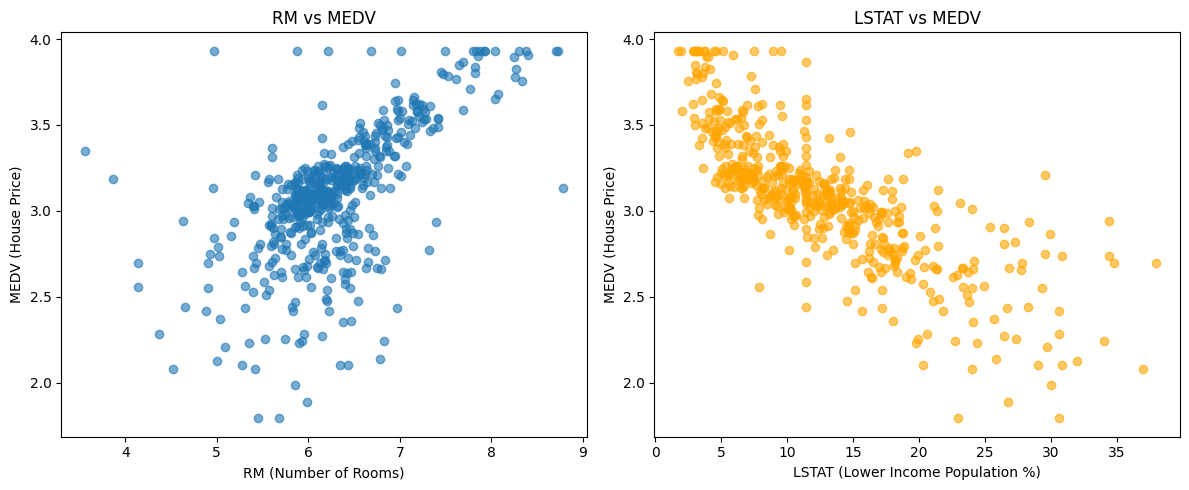

In [11]:
# Re-importing the libraries after reset
import matplotlib.pyplot as plt

# Visualize RM vs MEDV and LSTAT vs MEDV
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RM vs MEDV
axes[0].scatter(df['RM'], df['MEDV'], alpha=0.6)
axes[0].set_title('RM vs MEDV')
axes[0].set_xlabel('RM (Number of Rooms)')
axes[0].set_ylabel('MEDV (House Price)')

# LSTAT vs MEDV
axes[1].scatter(df['LSTAT'], df['MEDV'], alpha=0.6, color='orange')
axes[1].set_title('LSTAT vs MEDV')
axes[1].set_xlabel('LSTAT (Lower Income Population %)')
axes[1].set_ylabel('MEDV (House Price)')

plt.tight_layout()
plt.show()

## Outlier check
- z-score사용해 체크및 제거

In [12]:
# check the outlier with zscore
from scipy import stats

# Outier : z -score (Z > 3)
## 3 표준편차이상 / 즉 99.7% 의 데이터가 평균에서 3 표준편차 이내 존재
z_scores = df.apply(stats.zscore)
outlier = (z_scores > 3) | (z_scores < -3)
## Outlier 갯수 확인
outlier_count = outlier.sum()
print(outlier_count)
## Outlier 제거
df_cut_outliers = df[(~outlier).all(axis=1)]

CRIM        8
ZN         28
INDUS       0
CHAS       34
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       6
MEDV        3
dtype: int64


In [13]:
# check the cut shape
df_cut_outliers.shape

(402, 14)

- outlier 제거후
 - row : 402
 - columns : 14

In [14]:
# CHAS drop
## Encoder Label Needed
df_cut_outliers = df_cut_outliers.drop(columns=['CHAS'])

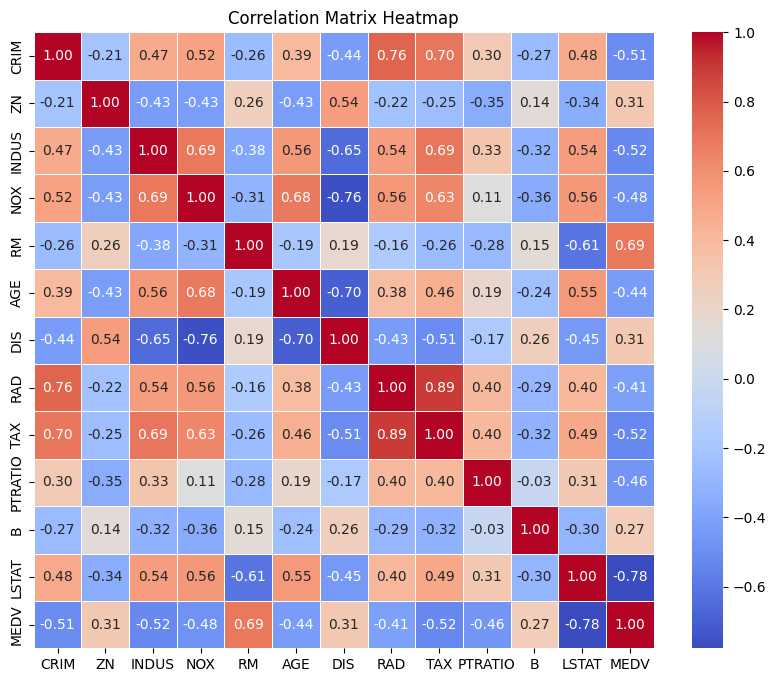

In [15]:
## find the correlation
corr_matrix = df_cut_outliers.corr()
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [16]:
## fine the correlation with MEDV
corr_with_medv = corr_matrix['MEDV'].sort_values(ascending=False)
corr_with_medv

,MEDV
MEDV,1.000000
RM,0.687544
DIS,0.307062
ZN,0.306161
B,0.273848
RAD,-0.412211
AGE,-0.436655
PTRATIO,-0.461245
NOX,-0.482304
CRIM,-0.510385


# Top 5 correlated features
1.   LSTAT
2.   RM
3.   TAX
4.   INDUS
5.   CRIM

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

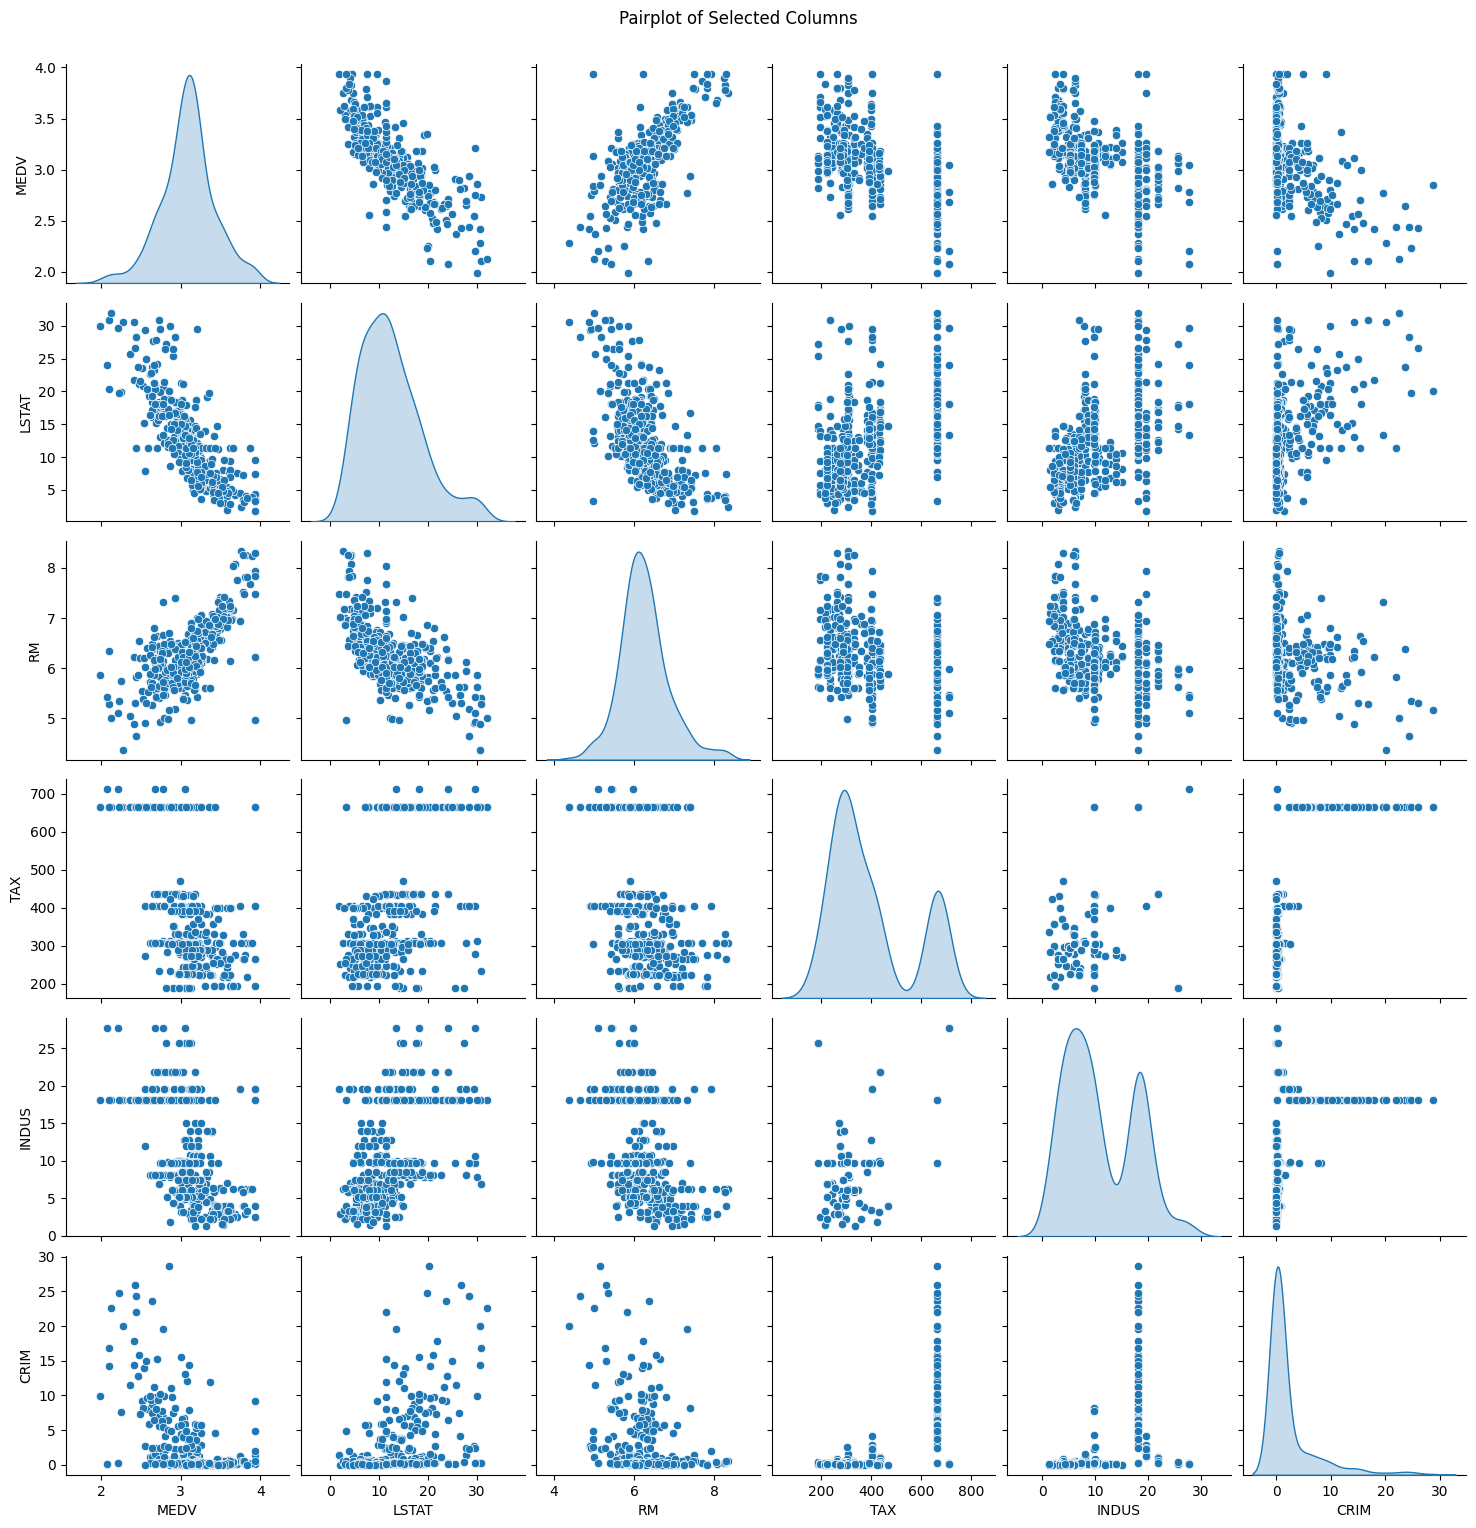

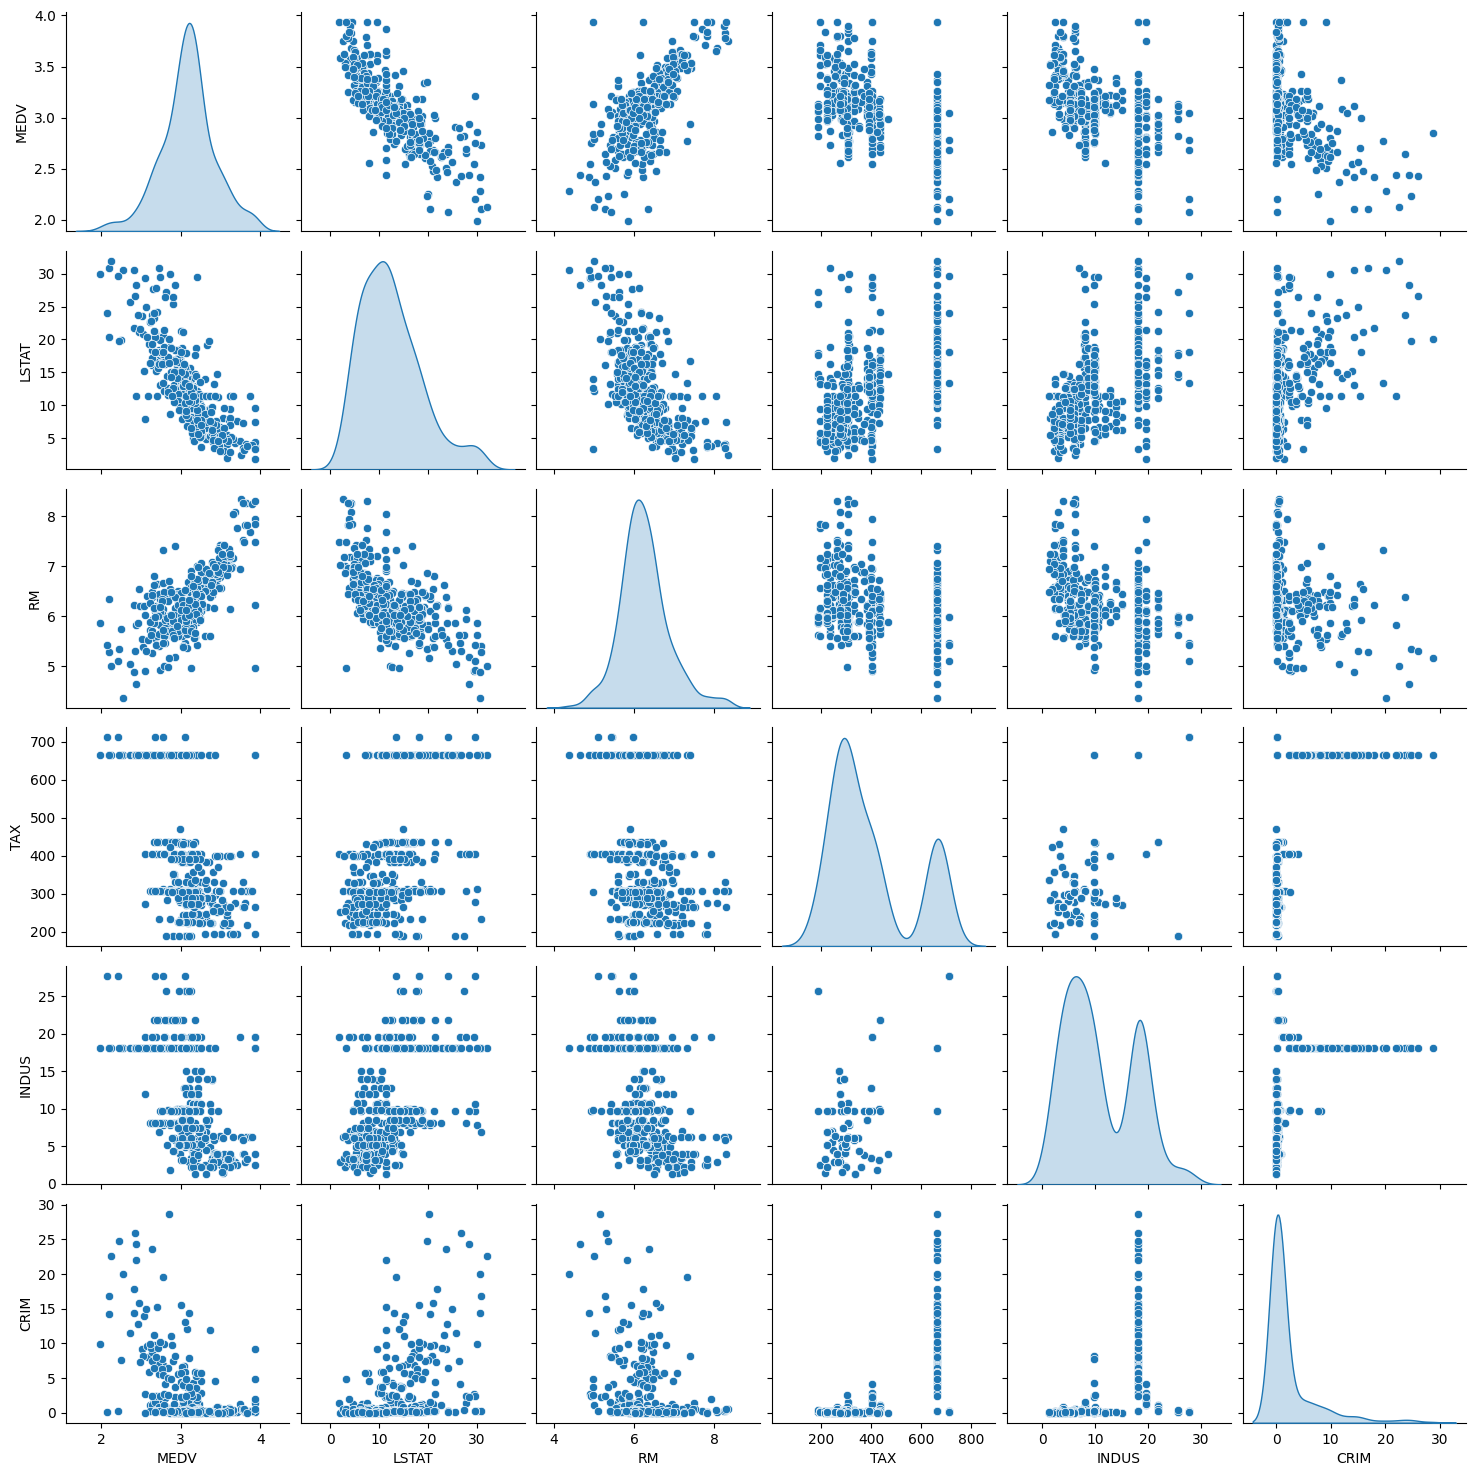

In [17]:
selected_columns = ['MEDV', 'LSTAT', 'RM', 'TAX', 'INDUS', 'CRIM']
selected_data = df_cut_outliers[selected_columns]
sns.pairplot(selected_data, diag_kind="kde", kind="scatter", palette="husl") # Pass 'MEDV' as a string
plt.suptitle("Pairplot of Selected Columns", y=1.02)
pairplot = sns.pairplot(selected_data, diag_kind="kde", kind="scatter", palette="husl")
plt.show()
# Save the pairplot to a PNG file
pairplot.savefig("pairplot_selected_columns.png", format='png')


In [18]:
from sklearn.model_selection import train_test_split

# 상관관계 기준: MEDV와 상관관계 절대값 상위 변수 추출
top_features = df.corr()['MEDV'].abs().sort_values(ascending=False).index[1:6]  # 상위 5개 변수
top_features_df = df[top_features]

print(top_features_df)
# 회귀 분석 준비
X = top_features_df
y = df['MEDV']

     LSTAT     RM  TAX  INDUS     CRIM
0     4.98  6.575  296   2.31  0.00632
1     9.14  6.421  242   7.07  0.02731
2     4.03  7.185  242   7.07  0.02729
3     2.94  6.998  222   2.18  0.03237
4    11.43  7.147  222   2.18  0.06905
..     ...    ...  ...    ...      ...
501  11.43  6.593  273  11.93  0.06263
502   9.08  6.120  273  11.93  0.04527
503   5.64  6.976  273  11.93  0.06076
504   6.48  6.794  273  11.93  0.10959
505   7.88  6.030  273  11.93  0.04741

[506 rows x 5 columns]


In [19]:
from scipy.stats import skew  # Import the 'skew' function

numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
CRIM,5.300336
CHAS,3.457512
ZN,2.317706
DIS,1.008779
RAD,1.001833
LSTAT,0.944270
NOX,0.727144
TAX,0.667968
RM,0.402415
INDUS,0.332512


In [20]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

There are 14 skewed numerical features to Box Cox transform


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['MEDV']) # Features (all columns except 'MEDV')
y = df['MEDV']               # Target variable ('MEDV' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

In [151]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42),
}

# Train and evaluate models
results = []
trained_models = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                              cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())

    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV_RMSE': cv_rmse
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('RMSE')


In [152]:
results_df

,Model,MSE,RMSE,MAE,R2,CV_RMSE
3,Gradient Boosting,0.001859,0.043112,0.030921,0.862853,0.050072
4,XGBoost,0.002104,0.045868,0.031030,0.844760,0.051026
2,Random Forest,0.002428,0.049275,0.032997,0.820839,0.051926
0,Linear Regression,0.003495,0.059119,0.038575,0.742106,0.059068
1,Decision Tree,0.003809,0.061715,0.039689,0.718964,0.069540



Best Model: Gradient Boosting


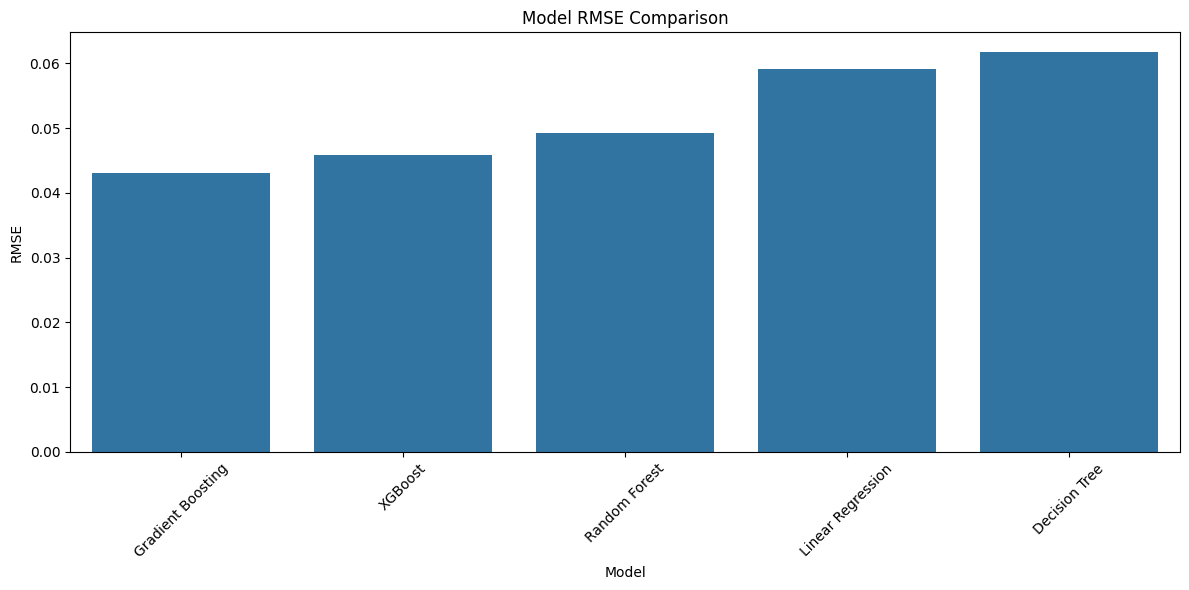

In [153]:
# Find best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.xticks(rotation=45)
plt.title('Model RMSE Comparison')
plt.tight_layout()
plt.show()


Best Model: Gradient Boosting


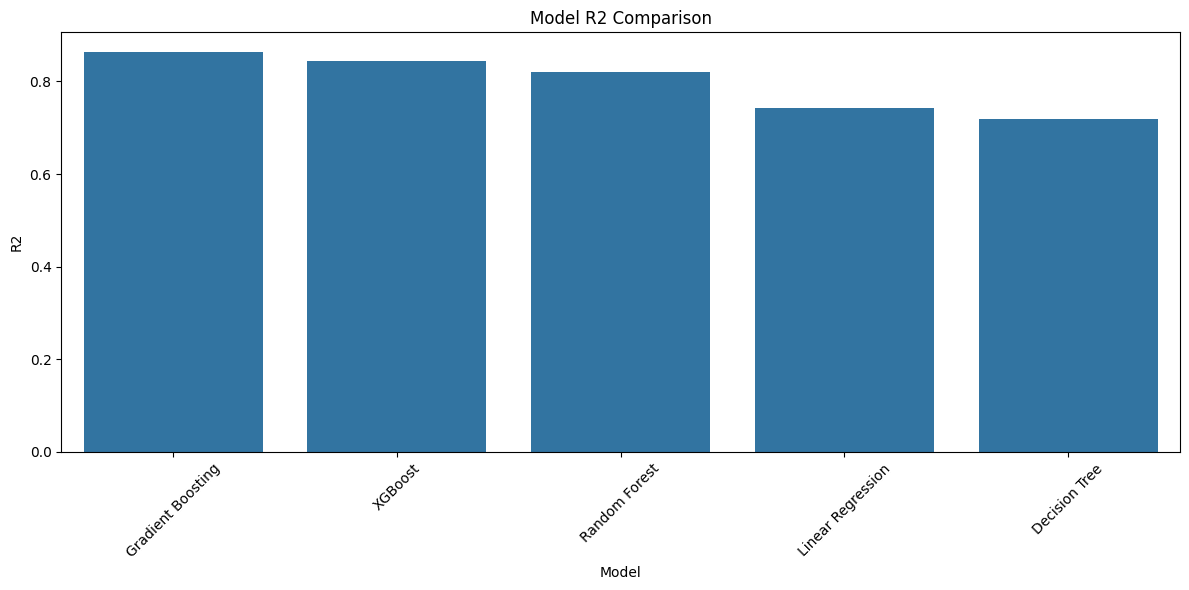

In [156]:
# Find best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.xticks(rotation=45)
plt.title('Model R2 Comparison')
plt.tight_layout()
plt.show()

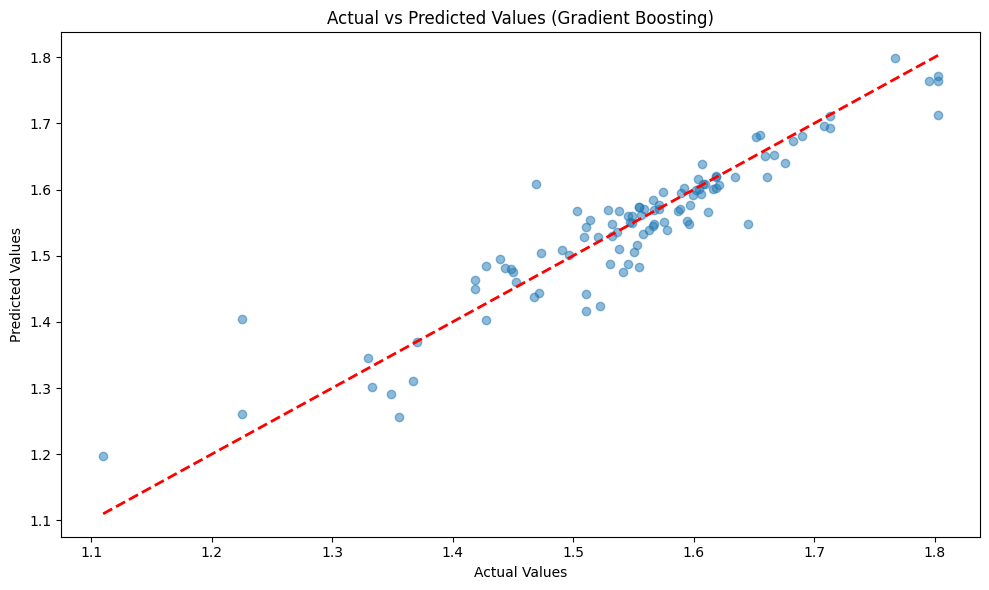

In [116]:
# Plot actual vs predicted for best model
y_pred_best = best_model.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values ({best_model_name})')
plt.tight_layout()
plt.show()

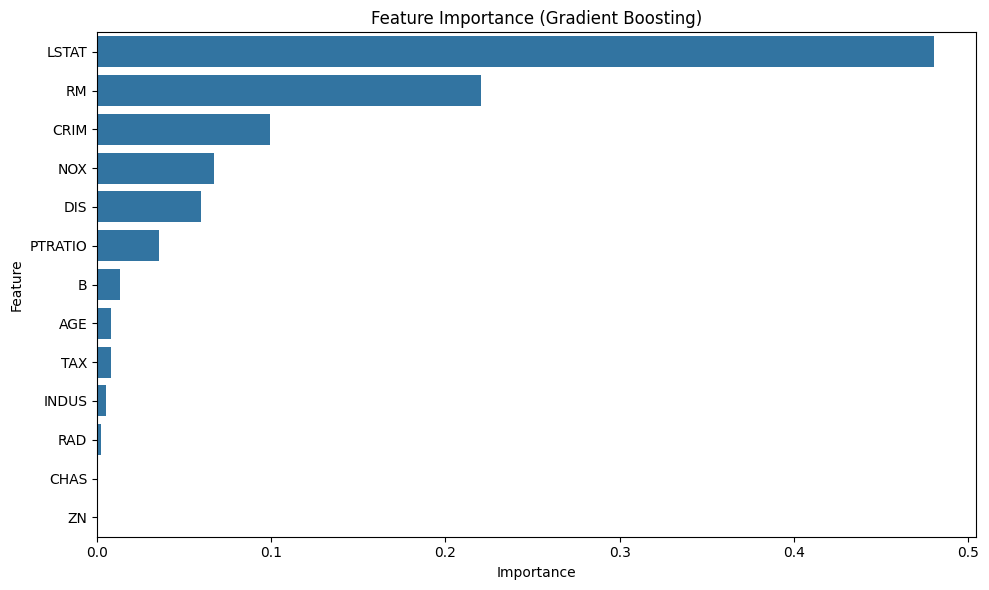

In [117]:
# best 모델서 가장 중요한 특성
if hasattr(best_model, 'feature_importances_'):
    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances)
    plt.title(f'Feature Importance ({best_model_name})')
    plt.tight_layout()
    plt.show()

In [118]:
# Save best model predictions
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best
})
predictions['Error'] = predictions['Actual'] - predictions['Predicted']
predictions['Accuracy'] = (1 - (predictions['Error'] / predictions['Actual']).abs()) * 100
print("\nPrediction Sample:")
print(predictions.head())


Prediction Sample:
       Actual  Predicted     Error   Accuracy
173  1.602062   1.599614  0.002448  99.847221
274  1.689640   1.680449  0.009191  99.456032
491  1.439285   1.494750 -0.055465  96.146317
72   1.592272   1.602900 -0.010628  99.332541
452  1.490565   1.509327 -0.018762  98.741285


In [119]:
## Aveage of accuracy
average_accuracy = predictions['Accuracy'].mean()
print(f"\nAverage Accuracy of Best Model: {average_accuracy:.2f}%")


Average Accuracy of Best Model: 97.93%


## Emsemble & Hyperparameter tuning

### hyperparmeter tuning

In [131]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
original_mse = mean_squared_error(y_test, y_pred)
original_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
original_mae = mean_absolute_error(y_test, y_pred)
original_r2 = r2_score(y_test, y_pred)

print(f"MSE: {original_mse}, RMSE: {original_rmse}, MAE: {original_mae}, R2: {original_r2}")

MSE: 0.0018586548547675115, RMSE: 0.04311211958101239, MAE: 0.030921228758306125, R2: 0.8628533799461733


# Greed Search with Gradient Boosting Model (GBM)

In [132]:
from sklearn.model_selection import GridSearchCV

# hyperparameter
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=None
)

grid_search.fit(X_train, y_train)
y_pred_grid_search = grid_search.predict(X_test)

grid_mse = mean_squared_error(y_test, y_pred_grid_search)
grid_rmse = np.sqrt(grid_mse)
grid_mae = mean_absolute_error(y_test, y_pred_grid_search)
grid_r2 = r2_score(y_test, y_pred_grid_search)

print("최적 파라미터:", grid_search.best_params_)
print(f"Grid search 튜닝 결과 - MSE: {grid_mse}, RMSE: {grid_rmse}, R2: {grid_r2}")
print("최적 RMSE:", np.sqrt(-grid_search.best_score_))
best_rse = np.sqrt(-grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=

# Randomized Search with Gradient Boosting Meodel (GBM)

In [133]:
# Randomized Search with Gradient Boosting Meodel (GBM)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# parameter
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# model
gb_model = GradientBoostingRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=None
)

random_search.fit(X_train, y_train)
y_pred_random_search = random_search.predict(X_test)

random_search_mse = mean_squared_error(y_test, y_pred_random_search)
random_search_rmse = np.sqrt(random_search_mse)
random_search_mae = mean_absolute_error(y_test, y_pred_random_search)
random_search_r2 = r2_score(y_test, y_pred_random_search)


print("최적 파라미터:", random_search.best_params_)
print(f"Randomized search 튜닝 결과 - MSE: {random_search_mse}, RMSE: {random_search_rmse}, R2: {random_search_r2}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.19727005942368125, max_depth=7, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.3s
[CV] END learning_rate=0.19727005942368125, max_depth=7, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.3s
[CV] END learning_rate=0.19727005942368125, max_depth=7, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.3s
[CV] END learning_rate=0.19727005942368125, max_depth=7, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.3s
[CV] END learning_rate=0.19727005942368125, max_depth=7, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.3s
[CV] END learning_rate=0.3093292420985183, max_depth=9, min_samples_leaf=19, min_samples_split=12, n_estimators=187; total time=   0.3s
[CV] END learning_rate=0.3093292420985183, max_depth=9, min_samples_leaf=19, min_samples_split=12, n_estimators=187;

In [147]:
baseline_results = {
    'Model': ['Before Tuned GBM', 'Grid Search GBM', 'Randomnized Search GBM'],
    'MSE' : [original_mse, grid_mse, random_search_mse],
    'RMSE': [original_rmse, grid_rmse, random_search_rmse],  # original_rmse는 기존 Gradient Boosting 결과
    'MAE' : [original_mae, grid_mae, random_search_mae],
    'R2': [original_r2, grid_r2, random_search_r2]
}
results_df = pd.DataFrame(baseline_results)
results_df = results_df.sort_values(by='RMSE', ascending=True)

results_df


,Model,MSE,RMSE,MAE,R2
0,Before Tuned GBM,0.001859,0.043112,0.030921,0.862853
1,Grid Search GBM,0.001913,0.043736,0.031252,0.858854
2,Randomnized Search GBM,0.002182,0.046716,0.034189,0.838963


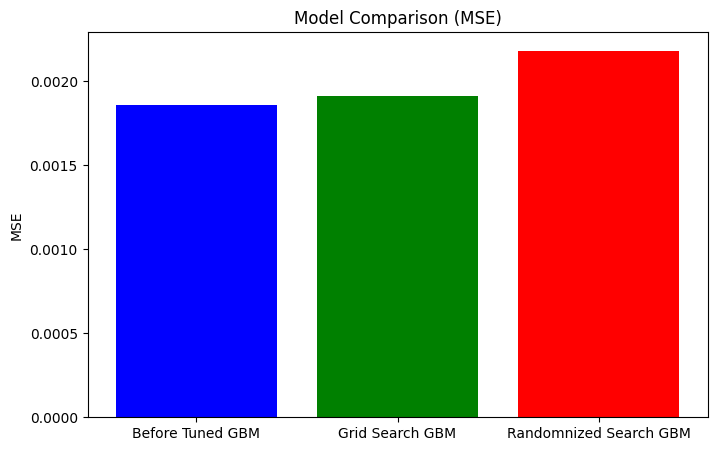

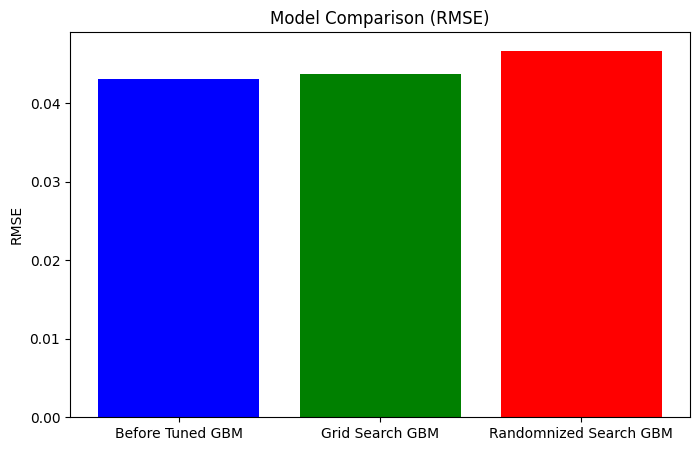

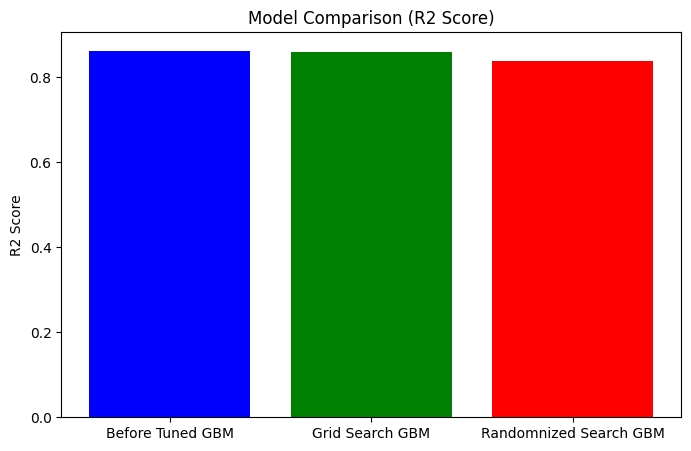

In [137]:
import matplotlib.pyplot as plt
# MSE 비교
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['MSE'], color=['blue', 'green', 'red'])
plt.title('Model Comparison (MSE)')
plt.ylabel('MSE')
plt.show()
# RMSE 비교
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['RMSE'], color=['blue', 'green','red'])
plt.title('Model Comparison (RMSE)')
plt.ylabel('RMSE')
plt.show()

# R2 비교
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['R2'], color=['blue', 'green', 'red'])
plt.title('Model Comparison (R2 Score)')
plt.ylabel('R2 Score')
plt.show()

In [138]:
# Xboost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_mse = mean_squared_error(y_test, y_pred, squared=False)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print(f"XGBoost - MSE: {xgb_mse}, RMSE: {xgb_rmse}, MAE: {xgb_mae}, R2: {xgb_r2}")

XGBoost - MSE: 0.04311211958101239, RMSE: 0.04311211958101239, MAE: 0.030921228758306125, R2: 0.8628533799461733


In [139]:
# RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, y_pred, squared=False)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}, R2: {rf_r2}")

Random Forest - MSE: 0.04311211958101239, RMSE: 0.04311211958101239, MAE: 0.03299726011048792, R2: 0.8208391173794801


In [140]:
# linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {lr_mse}, RMSE: {lr_rmse}, MAE: {lr_mae}, R2: {lr_r2}")

Linear Regression - MSE: 0.003495064718284031, RMSE: 0.059119072373338466, MAE: 0.03857468208558433, R2: 0.7421057966988756


In [141]:
# 다른 상위 4 모델의 결과를 수집
results = [
    {'Model': 'Grid Search Gradiant Boosting', 'MSE': grid_mse,'RMSE': grid_rmse,'MAE': grid_mae, 'R2': grid_r2},
    {'Model': 'Randomized Search Gradiant Boosting', 'MSE': random_search_mse,'RMSE': random_search_rmse,'MAE': random_search_mae, 'R2': random_search_r2},
    {'Model': 'Gradient Boosting', 'MSE': original_mse,'RMSE': original_rmse,'MAE': original_mae, 'R2': original_r2},
    {'Model': 'XGBoost', 'MSE': xgb_mse,'RMSE': xgb_rmse,'MAE': xgb_mae, 'R2': xgb_r2},
    {'Model': 'Random Forest', 'MSE': rf_mse,'RMSE': rf_rmse,'MAE': rf_mae, 'R2': rf_r2},
    {'Model': 'Linear Regression', 'MSE': lr_mse,'RMSE': lr_rmse,'MAE': lr_mae, 'R2': lr_r2}
]
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)
results_df


                                 Model       MSE      RMSE       MAE        R2
2                    Gradient Boosting  0.001859  0.043112  0.030921  0.862853
3                              XGBoost  0.043112  0.043112  0.030921  0.862853
4                        Random Forest  0.043112  0.043112  0.032997  0.820839
0        Grid Search Gradiant Boosting  0.001913  0.043736  0.031252  0.858854
1  Randomized Search Gradiant Boosting  0.002182  0.046716  0.034189  0.838963
5                    Linear Regression  0.003495  0.059119  0.038575  0.742106


In [142]:
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")
y_pred_best = best_model.predict(X_test_scaled)
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best
})
predictions['Error'] = predictions['Actual'] - predictions['Predicted']
predictions['Accuracy'] = (1 - (predictions['Error'] / predictions['Actual']).abs()) * 100
average_accuracy = predictions['Accuracy'].mean()

print(f"\nAverage Accuracy of Best Model: {average_accuracy:.2f}%")
print("\nPrediction Sample:")
print(predictions.head())


Best Model: Gradient Boosting
MSE: 0.0021038582300759345, RMSE: 0.045867834373076025, MAE: 0.031029913406342872, R2: 0.8447602874803607

Average Accuracy of Best Model: 97.93%

Prediction Sample:
       Actual  Predicted     Error   Accuracy
173  1.602062   1.599614  0.002448  99.847221
274  1.689640   1.680449  0.009191  99.456032
491  1.439285   1.494750 -0.055465  96.146317
72   1.592272   1.602900 -0.010628  99.332541
452  1.490565   1.509327 -0.018762  98.741285


# Voting regressor (emsemble)

In [143]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor([
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42))
])
voting_regressor.fit(X_train, y_train)
y_pred_voting = voting_regressor.predict(X_test)
voting_mse = mean_squared_error(y_test, y_pred_voting)
voting_rmse = np.sqrt(mean_squared_error(y_test, y_pred_voting))
voting_mae = mean_absolute_error(y_test, y_pred_voting)
voting_r2 = r2_score(y_test, y_pred_voting)

print(f"Voting Regressor - MSE: {voting_mse}, RMSE: {voting_rmse}, MAE: {voting_mae}, R2: {voting_r2}")

Voting Regressor - MSE: 0.0019309586767229272, RMSE: 0.04394267489267042, MAE: 0.030581687311593764, R2: 0.8575182179214846


# Stacking regressor (emsemble)


In [144]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

stacking_regressor = StackingRegressor(
    estimators=[
        ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)),
        ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42))
    ],
    final_estimator=Ridge(alpha=1.0, solver='lsqr')
)
stacking_regressor.fit(X_train, y_train)
y_pred_stacking = stacking_regressor.predict(X_test)
stacking_mse = mean_squared_error(y_test, y_pred_stacking)
stacking_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stacking))
stacking_mae = mean_absolute_error(y_test, y_pred_stacking)
stacking_r2 = r2_score(y_test, y_pred_stacking)

print(f"Stacking Regressor - MSE: {stacking_mse}, RMSE: {stacking_rmse}, MAE: {stacking_mae}, R2: {stacking_r2}")

Stacking Regressor - MSE: 0.0019538437539747466, RMSE: 0.04420230484912237, MAE: 0.03105632253589649, R2: 0.8558295714324891


In [145]:
results = [
    {'Model': 'Gradient Boosting', 'MSE': original_mse,'RMSE': original_rmse,'MAE': original_mae, 'R2': original_r2},
    {'Model': 'XGBoost', 'MSE': xgb_mse,'RMSE': xgb_rmse,'MAE': xgb_mae, 'R2': xgb_r2},
    {'Model': 'Random Forest', 'MSE': rf_mse,'RMSE': rf_rmse,'MAE': rf_mae, 'R2': rf_r2},
    {'Model': 'Voting Regressor', 'MSE': voting_mse,'RMSE': voting_rmse,'MAE': voting_mae, 'R2': voting_r2},
    {'Model': 'Stacking Regressor', 'MSE': stacking_mse,'RMSE': stacking_rmse,'MAE': stacking_mae, 'R2': stacking_r2}
]
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE', ascending=True)
results_df

                Model       MSE      RMSE       MAE        R2
0   Gradient Boosting  0.001859  0.043112  0.030921  0.862853
1             XGBoost  0.043112  0.043112  0.030921  0.862853
2       Random Forest  0.043112  0.043112  0.032997  0.820839
3    Voting Regressor  0.001931  0.043943  0.030582  0.857518
4  Stacking Regressor  0.001954  0.044202  0.031056  0.855830


In [146]:
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")
y_pred_best = best_model.predict(X_test_scaled)
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best
})
predictions['Error'] = predictions['Actual'] - predictions['Predicted']
predictions['Accuracy'] = (1 - (predictions['Error'] / predictions['Actual']).abs()) * 100
average_accuracy = predictions['Accuracy'].mean()
print("\nPrediction Sample:")
print(predictions.head())
print(f"\nAverage Accuracy of Best Model: {average_accuracy:.2f}%")


Best Model: Gradient Boosting
MSE: 0.0021038582300759345, RMSE: 0.045867834373076025, MAE: 0.031029913406342872, R2: 0.8447602874803607

Prediction Sample:
       Actual  Predicted     Error   Accuracy
173  1.602062   1.599614  0.002448  99.847221
274  1.689640   1.680449  0.009191  99.456032
491  1.439285   1.494750 -0.055465  96.146317
72   1.592272   1.602900 -0.010628  99.332541
452  1.490565   1.509327 -0.018762  98.741285

Average Accuracy of Best Model: 97.93%
